Trabalho 3 - Pandas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('Netflix TV Shows and Movies.csv')

primeiros_10_itens = df.head(10)
print(primeiros_10_itens)

   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   
5      5   tm14873                      Dirty Harry  MOVIE   
6      6  tm185072                     My Fair Lady  MOVIE   
7      7   tm98978                  The Blue Lagoon  MOVIE   
8      8  tm119281                 Bonnie and Clyde  MOVIE   
9      9   tm67378                The Professionals  MOVIE   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins t

In [23]:
ultimos_10_itens = df.tail(10)
print(ultimos_10_itens)

      index         id                               title   type  \
5273   5273  tm1097142                            My Bride  MOVIE   
5274   5274   tm878575                 The Heartbreak Club  MOVIE   
5275   5275   ts286386                         The Big Day   SHOW   
5276   5276   tm985215                Princess 'Daya'Reese  MOVIE   
5277   5277  tm1004011                       Time to Dance  MOVIE   
5278   5278  tm1040816         Momshies! Your Soul is Mine  MOVIE   
5279   5279  tm1014599                           Fine Wine  MOVIE   
5280   5280  tm1045018                               Clash  MOVIE   
5281   5281  tm1098060                      Shadow Parties  MOVIE   
5282   5282   ts271048  Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
5273  The story follows a young man and woman who go...          2021   
5274  Coping with heartbreak, the shy owner of floun...          2021   
5275  For six engaged

In [24]:
maior_imdb = df[df['imdb_score'] == df['imdb_score'].max()]
menor_imdb = df[df['imdb_score'] == df['imdb_score'].min()]

print(maior_imdb[['title', 'imdb_score']])
print(menor_imdb[['title', 'imdb_score']])


         title  imdb_score
622   Khawatir         9.6
2787  #ABtalks         9.6
        title  imdb_score
1664  Aerials         1.5


In [25]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
media_duracao_show = df[df['type'] == 'SHOW']['runtime'].mean()
media_duracao_filme = df[df['type'] == 'MOVIE']['runtime'].mean()

print(f"Média de duração dos shows: {media_duracao_show}")
print(f"Média de duração dos filmes: {media_duracao_filme}")


Média de duração dos shows: 38.63272921108742
Média de duração dos filmes: 101.53742295274435


In [26]:
show_maior_duracao = df[df['type'] == 'SHOW'].sort_values(by='runtime', ascending=False).iloc[0]
filme_maior_duracao = df[df['type'] == 'MOVIE'].sort_values(by='runtime', ascending=False).iloc[0]

print(show_maior_duracao[['title', 'runtime']])
print(filme_maior_duracao[['title', 'runtime']])


title      1994
runtime     178
Name: 3598, dtype: object
title      No Longer Kids
runtime               235
Name: 24, dtype: object


In [28]:
df_filmes_imdb = df[df['imdb_score'].notna() & (df['type'] == 'MOVIE')]
ano_com_mais_avaliacoes = df_filmes_imdb['release_year'].value_counts().idxmax()

print(f"Ano com mais filmes avaliados: {ano_com_mais_avaliacoes}")

Ano com mais filmes avaliados: 2019


In [29]:
age_certification_counts = df['age_certification'].value_counts()
print(age_certification_counts)

age_certification
TV-MA    792
R        548
TV-14    436
PG-13    424
PG       238
TV-PG    172
G        105
TV-Y7    104
TV-Y      94
TV-G      72
NC-17     13
Name: count, dtype: int64


In [30]:
colunas_vazias = df.isnull().sum()
print(colunas_vazias[colunas_vazias > 0])

description             5
age_certification    2285
imdb_votes             16
dtype: int64


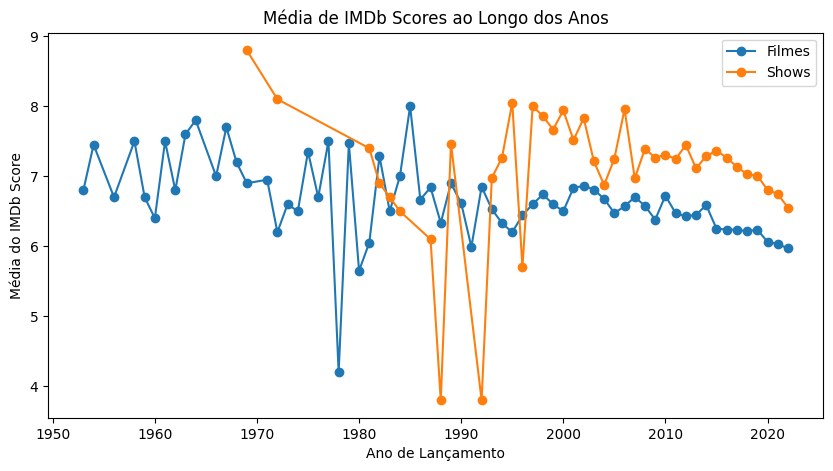

In [31]:
df_filmes = df[(df['type'] == 'MOVIE') & (df['imdb_score'].notna())]
df_shows = df[(df['type'] == 'SHOW') & (df['imdb_score'].notna())]
media_scores_filmes = df_filmes.groupby('release_year')['imdb_score'].mean()
media_scores_shows = df_shows.groupby('release_year')['imdb_score'].mean()

plt.figure(figsize=(10, 5))
plt.plot(media_scores_filmes, label='Filmes', marker='o')
plt.plot(media_scores_shows, label='Shows', marker='o')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Média do IMDb Score')
plt.title('Média de IMDb Scores ao Longo dos Anos')
plt.legend()
plt.show()


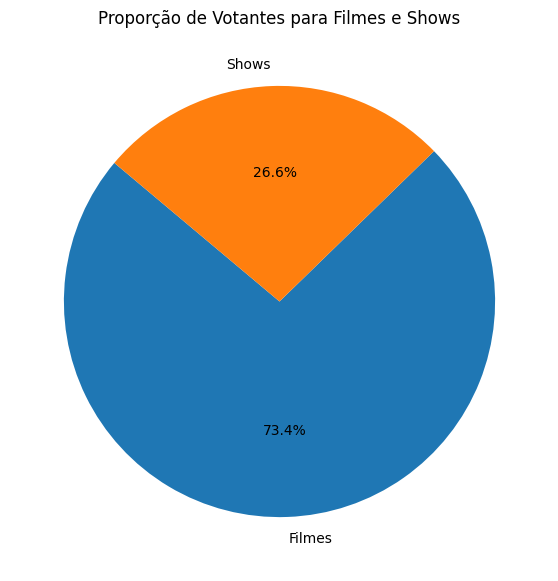

In [32]:
df_filmes_votos = df[(df['type'] == 'MOVIE') & (df['imdb_votes'].notna())]
df_shows_votos = df[(df['type'] == 'SHOW') & (df['imdb_votes'].notna())]
votos_filmes = df_filmes_votos['imdb_votes'].sum()
votos_shows = df_shows_votos['imdb_votes'].sum()

plt.figure(figsize=(7, 7))
plt.pie([votos_filmes, votos_shows], labels=['Filmes', 'Shows'], autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Votantes para Filmes e Shows')
plt.show()
